# Discrete Random Walk

Consider a discrete random walk.

Let $X_t = X_{t+1} + \epsilon_t$, with $p(\epsilon_t = 1) = 0.5$ and $p(\epsilon_t = -1) = 0.5$ be the stepwise random walk. Each possible arrival point $(t,X_{t})$ of the random walk is reached through a unique number of upsteps and downsteps, but the sequence of upsteps and downsteps does not matter, so that there may be many different paths. Since up-steps and down-steps are equally likely, the probability of any path of length $t$, corresponding to a specific sequence of innovations $\{\epsilon_t\}$, is $p(\{\epsilon_t\}) = \frac{1}{2^t}$. The point $(t,X_t)$ can be expressed in terms of the number of upsteps ($y$) and downsteps ($x$) (which amounts to a $45\deg$ coordinate rotation). 

\begin{equation}
X_t = y-x\\
t = y+x
\end{equation}

From which follows:
\begin{equation}
x = \frac{t-X_t}{2}\\
y = \frac{t+X_t}{2}
\end{equation}

The total amount of paths that lead from $(0,0)$ to $(t,X_t)$ are given by all possible sequences of $x$ downsteps and $y$ upsteps. 

\begin{equation}
n(t,X_t) = \left(\begin{array}{c}x+y\\x\end{array}\right) = \left(\begin{array}{c}x+y\\y\end{array}\right) =  \left(\begin{array}{c}t\\\frac{t+X_t}{2}\end{array}\right) = \left(\begin{array}{c}t\\\frac{t-X_t}{2}\end{array}\right)
\end{equation}

If $\frac{t\pm X_t}{2}$ are integer and 0 otherwise. 

Given that $X_t = \sum^t_i \epsilon_t$, the probability $p(X_t = s)$ is:

\begin{equation}
p(X_t = s) = \sum^t_{\{\epsilon_t\}}\prod^t_ip(\epsilon_i)
\end{equation}

Where the sum is over all sequences of $\{\epsilon_t\}$ so that $\sum^t_i \epsilon_t = s$, and it follows:

\begin{equation}
p(s) = \left(\begin{array}{c}t\\\frac{t-X_t}{2} \end{array}\right)\frac{1}{2^t}
\end{equation}

Text(0.5, 1.0, 'p(X_t=s)')

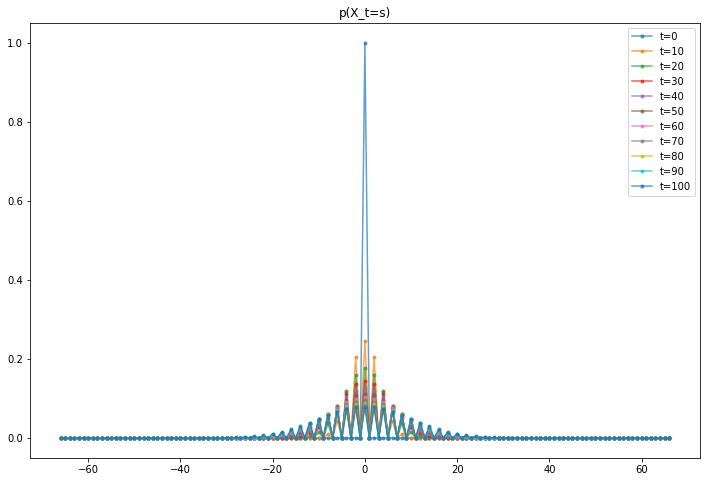

In [24]:
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt

def random_walk(t):
    """
    returns a single random walk
    """
    return np.cumsum([0]+[rnd.choice([-1,1]) for i in range(t)])
    
    

def factorial(x):
    if x == 0:
        return 1
    else:
        res = 1
        for i in range(1,x+1):
            res *= i
        return int(res)
    
def binomial(n,k):
    if k >= 0 and n >= 0 and k <= n:
        return int(factorial(n)/(factorial(n-k)*factorial(k)))
    else:
        return 0


def p_s(t,X_t):

    """
    Probability of a path reaching t,X_t
    """
    
    x = (t - X_t)/2
    
    if x % 1 != 0:
        return 0
    else:
        return binomial(int(t),int(x))/(2**t)
    
    
tt = [int(10*i) for i in range(11)]
ss = [int(i) for i in range(-int(max(tt)/1.5),int(max(tt)/1.5)+1)]


plt.figure(figsize=(12,8))
for t in tt:
    
    ps = [p_s(t,s) for s in ss]
    
    plt.plot(ss,ps,'.-',alpha=0.7)
    
plt.legend(['t=%i' % i for i in tt])
plt.title("p(X_t=s)")

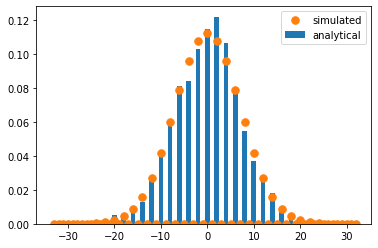

In [25]:
for t in [50]:
    X_t = []
    for i in range(2000):
        walk = random_walk(50)
        X_t += [walk[-1]]


    bins = [i for i in range(-int(t/1.5),int(t/1.5))]
    plt.hist(X_t,density=True,bins=bins,align='left')
    ps = [p_s(t,s) for s in bins]
    plt.plot(bins,ps,'.',markersize=15)

    plt.legend(['simulated','analytical'])

# Dyck Paths

So then, how many of these paths never go below the horizon? These paths correspond to Dyck Words: they are sequences where there are always at least as many "+1" steps as there are "-1" steps. 

In the ``Counting Paths - Catalan Numbers and Dyck Words`` notebook, I came up with the formula:

\begin{equation}
f(x,y) = \sum^y_{k=x}f(x-1,k)\\
\forall x>0,\ y\geq x
\end{equation}

With boundary condition:

\begin{equation}
f(y,0) = 1\\ \forall y\geq 0
\end{equation}

Where I exchanged x and y with respect to the other notebookk, because in this problem I calculated so that $y\geq x$ and not the other way around. For the number of paths that reach each grid point. This implies the probability distribution for Dyck paths of:

\begin{equation}
p_D(x,y) = \frac{1}{2^{x+y}}f(x,y) = \frac{1}{2^{x+y}}\sum^y_{k=x}f(x-1,k) = \frac{1}{2^{y-x+1}}\sum_{n=0}^{y-x}p_D(x-1,x+n)
\end{equation}

Changing variables:
\begin{equation}
p_D(X_t=s) = p_D(s,t) = \frac{1}{2^{s+1}}\sum_{n=0}^s p_D(s'=n+1,t'=t-(s-n+1))
\end{equation}
and 
\begin{equation}
p_D(s=t) = 1 \\
\forall s\leq t\\
\\
p_D(s,t) = 0\\
\forall s > t
\end{equation}

Text(0.5, 1.0, '1000 paths, 26 above horizon (2.6%)')

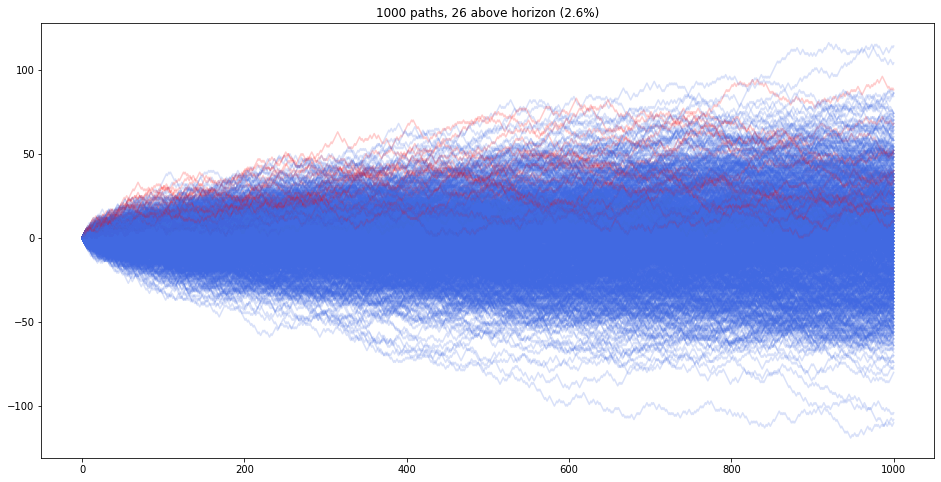

In [26]:
def is_dyck(walk):
    """
    check whether the walk is a dyck word, i.e. it never goes below the horizon
    """
    if any(walk < 0):
        return False
    else:
        return True
    
    
color_code = {True: 'red', False: 'royalblue'}

plt.figure(figsize=(16,8))

total = 0
dyck_words = 0
for i in range(1000):
    walk = random_walk(1000)
    
    cc = False
    total += 1
    if is_dyck(walk):
        dyck_words += 1
        cc = True
        
    plt.plot(walk,color = color_code[cc],alpha=0.2)
    
plt.title('%i paths, %i above horizon (%1.1f%%)' % (total,dyck_words,100*dyck_words/total))